In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [2]:
train_file='D:/Evancer/Python/Projects/Project 3/counterfeit_train.csv'
test_file='D:/Evancer/Python/Projects/Project 3/counterfeit_test.csv'

In [3]:
cf_train=pd.read_csv(train_file)
cf_test=pd.read_csv(test_file)

In [4]:
cf_train.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [5]:
cf_test['Counterfeit_Sales']=np.nan
cf_train['data']='train'
cf_test['data']='test'
cf_test=cf_test[cf_train.columns]


In [6]:
cf_all=pd.concat([cf_train,cf_test],axis=0)

In [7]:
cf_all.dtypes

Medicine_ID             object
Counterfeit_Weight     float64
DistArea_ID             object
Active_Since             int64
Medicine_MRP           float64
Medicine_Type           object
SidEffect_Level         object
Availability_rating    float64
Area_Type               object
Area_City_Type          object
Area_dist_level         object
Counterfeit_Sales      float64
data                    object
dtype: object

In [8]:
cf_all.drop(['Medicine_ID'],axis=1,inplace=True)

In [9]:
cf_all.dtypes

Counterfeit_Weight     float64
DistArea_ID             object
Active_Since             int64
Medicine_MRP           float64
Medicine_Type           object
SidEffect_Level         object
Availability_rating    float64
Area_Type               object
Area_City_Type          object
Area_dist_level         object
Counterfeit_Sales      float64
data                    object
dtype: object

In [10]:
cf_all.isnull().sum()

Counterfeit_Weight     1463
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales      1705
data                      0
dtype: int64

In [11]:
cf_all.loc[cf_all['Counterfeit_Weight'].isnull(),'Counterfeit_Weight']=cf_all.loc[cf_all['data']=='train','Counterfeit_Weight'].mean()

In [12]:
cf_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 1704
Data columns (total 12 columns):
Counterfeit_Weight     8523 non-null float64
DistArea_ID            8523 non-null object
Active_Since           8523 non-null int64
Medicine_MRP           8523 non-null float64
Medicine_Type          8523 non-null object
SidEffect_Level        8523 non-null object
Availability_rating    8523 non-null float64
Area_Type              8523 non-null object
Area_City_Type         8523 non-null object
Area_dist_level        8523 non-null object
Counterfeit_Sales      6818 non-null float64
data                   8523 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [13]:
pd.crosstab(cf_train['DistArea_ID'],cf_train['Area_dist_level'])

Area_dist_level,High,Medium,Small,Unknown
DistArea_ID,,,,
Area010,0,0,0,442
Area013,749,0,0,0
Area017,0,0,0,760
Area018,0,729,0,0
Area019,0,0,431,0
Area027,0,735,0,0
Area035,0,0,748,0
Area045,0,0,0,736
Area046,0,0,749,0


In [14]:
pd.crosstab(cf_all['Area_Type'],cf_all['Area_dist_level'])

Area_dist_level,High,Medium,Small,Unknown
Area_Type,,,,
CityLimits,0,935,0,0
DownTown,932,930,1860,1855
Industrial,0,928,0,0
MidTownResidential,0,0,528,555


In [15]:
pd.crosstab(cf_train['Area_City_Type'],cf_train['Area_dist_level'])

Area_dist_level,High,Medium,Small,Unknown
Area_City_Type,,,,
Tier 1,0,739,1180,0
Tier 2,0,0,748,1496
Tier 3,749,1464,0,442


In [16]:
pd.crosstab(cf_train['Area_City_Type'],cf_train['Area_Type'])

Area_Type,CityLimits,DownTown,Industrial,MidTownResidential
Area_City_Type,,,,
Tier 1,0,1488,0,431
Tier 2,0,2244,0,0
Tier 3,735,749,729,442


In [17]:
pd.crosstab(cf_train['Area_City_Type'],cf_train['SidEffect_Level'])

SidEffect_Level,critical,mild
Area_City_Type,,
Tier 1,665,1254
Tier 2,776,1468
Tier 3,943,1712


In [18]:
cf_all['AT_DownTown']=np.where(cf_all["Area_Type"]=="DownTown",1,0)
cf_all["AT_MTR"]=np.where(cf_all["Area_Type"]=="MidTownResidential",1,0)

In [19]:
cf_all['Area_Tier_3']=np.where(cf_all["Area_City_Type"]=="Tier 3",1,0)

In [20]:
cf_dummies=pd.get_dummies(cf_all['Area_dist_level'],drop_first=True)

In [21]:
cf_dummies

,Medium,Small,Unknown
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1700,1,0,0
1701,0,1,0
1702,0,0,1
1703,1,0,0


In [22]:
cf_all=pd.concat([cf_all,cf_dummies],axis=1)

In [23]:
cf_all.drop(['Area_Type',"Area_City_Type","DistArea_ID","Area_dist_level"],axis=1,inplace=True)

In [24]:
cf_all.dtypes

Counterfeit_Weight     float64
Active_Since             int64
Medicine_MRP           float64
Medicine_Type           object
SidEffect_Level         object
Availability_rating    float64
Counterfeit_Sales      float64
data                    object
AT_DownTown              int32
AT_MTR                   int32
Area_Tier_3              int32
Medium                   uint8
Small                    uint8
Unknown                  uint8
dtype: object

In [25]:
cf_all['SidEffect_Level']=np.where(cf_all["SidEffect_Level"]=="critical",1,0)

In [26]:
cf_all.dtypes

Counterfeit_Weight     float64
Active_Since             int64
Medicine_MRP           float64
Medicine_Type           object
SidEffect_Level          int32
Availability_rating    float64
Counterfeit_Sales      float64
data                    object
AT_DownTown              int32
AT_MTR                   int32
Area_Tier_3              int32
Medium                   uint8
Small                    uint8
Unknown                  uint8
dtype: object

In [27]:
cf_all.shape

(8523, 14)

In [28]:
cf_all.head()

,Counterfeit_Weight,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Counterfeit_Sales,data,AT_DownTown,AT_MTR,Area_Tier_3,Medium,Small,Unknown
0,13.100000,1995,160.2366,Antimalarial,1,0.070422,1775.5026,train,1,0,0,0,1,0
1,14.115057,1983,110.4384,Mstablizers,0,0.013000,3069.1520,train,0,0,1,1,0,0
2,9.025000,1995,259.4092,Cardiac,0,0.060783,2603.0920,train,1,0,0,0,1,0
3,11.800000,1995,99.9830,OralContraceptives,0,0.065555,1101.7130,train,1,0,0,0,1,0
4,14.115057,1983,56.4402,Hreplacements,1,0.248859,158.9402,train,0,1,0,0,1,0


In [29]:
cf_dummies1=pd.get_dummies(cf_all['Medicine_Type'])

In [30]:
cf_all=pd.concat([cf_all,cf_dummies1],axis=1)

In [31]:
cf_all.drop(["Medicine_Type",'Antiviral','Stimulants'],axis=1,inplace=True)

In [32]:
cf_all.isnull().sum()

Counterfeit_Weight        0
Active_Since              0
Medicine_MRP              0
SidEffect_Level           0
Availability_rating       0
Counterfeit_Sales      1705
data                      0
AT_DownTown               0
AT_MTR                    0
Area_Tier_3               0
Medium                    0
Small                     0
Unknown                   0
Analgesics                0
Antacids                  0
Antibiotics               0
Antifungal                0
Antimalarial              0
Antipyretics              0
Antiseptics               0
Cardiac                   0
Hreplacements             0
Mstablizers               0
MuscleRelaxants           0
OralContraceptives        0
Statins                   0
Tranquilizers             0
dtype: int64

In [33]:
cf_all.dtypes

Counterfeit_Weight     float64
Active_Since             int64
Medicine_MRP           float64
SidEffect_Level          int32
Availability_rating    float64
Counterfeit_Sales      float64
data                    object
AT_DownTown              int32
AT_MTR                   int32
Area_Tier_3              int32
Medium                   uint8
Small                    uint8
Unknown                  uint8
Analgesics               uint8
Antacids                 uint8
Antibiotics              uint8
Antifungal               uint8
Antimalarial             uint8
Antipyretics             uint8
Antiseptics              uint8
Cardiac                  uint8
Hreplacements            uint8
Mstablizers              uint8
MuscleRelaxants          uint8
OralContraceptives       uint8
Statins                  uint8
Tranquilizers            uint8
dtype: object

In [34]:
cf_all.shape

(8523, 27)

In [35]:
cf_train=cf_all[cf_all['data']=='train']
del cf_train['data']
cf_test=cf_all[cf_all['data']=='test']
cf_test.drop(['Counterfeit_Sales','data'],axis=1,inplace=True)

C:\Users\Pc\Anaconda3\Anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [36]:
x_train=cf_train.drop('Counterfeit_Sales',axis=1)
y_train=cf_train["Counterfeit_Sales"]

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
cf_train1,cf_train2=train_test_split(cf_train,test_size=0.2,random_state=2)

In [39]:
x_train1=cf_train1.drop('Counterfeit_Sales',axis=1)
y_train1=cf_train1["Counterfeit_Sales"]

In [ ]:
x_train1.head(20)

# Modeling

In [ ]:
## Linear regression
from sklearn.linear_model import LinearRegression

In [ ]:
lm=LinearRegression()

In [ ]:
lm.fit(x_train1,y_train1)

In [ ]:
x_train1.shape

In [ ]:
lm.intercept_

In [ ]:
list(zip(x_train1.columns,lm.coef_))

In [56]:
x_train2=cf_train2.drop('Counterfeit_Sales',axis=1)
y_train2=cf_train2["Counterfeit_Sales"]

In [ ]:
predict_sales=lm.predict(x_train2)

In [40]:
from sklearn.metrics import mean_absolute_error

In [ ]:
MAE=mean_absolute_error(y_train2,predict_sales)
MAE

In [ ]:
Score = 1-(MAE/1660)

In [ ]:
Score

In [ ]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
errors =np.abs(cross_val_score(lm,x_train1,y_train1,cv=10,scoring='neg_mean_absolute_error'))

In [ ]:
errors

In [ ]:
model=Ridge(fit_intercept=True)

In [ ]:
lambdas=np.linspace(1,100,200)
params={'alpha':lambdas}

In [ ]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')

In [ ]:
grid_search.fit(x_train1,y_train1)

In [ ]:
grid_search.best_estimator_

In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
# np.flatnonzero extracts index of `True` in a boolean array
         candidate = np.flatnonzero(results['rank_test_score'] == i)[0]
# print rank of the model
# values passed to function format here are put in the curly brackets when printing
# 0 , 1 etc refer to placeholder for position of values passed to format function
# .3f means upto 2 decimal digits
         print("Model with rank: {0}".format(i))
# this prints cross validate performance and its standard deviation
         print("Mean validation score: {0:.5f} (std: {1:.5f})".format(
            results['mean_test_score'][candidate],
            results['std_test_score'][candidate]))
# prints the paramter combination for which this performance was obtained
         print("Parameters: {0}".format(results['params'][candidate]))
         print("")

In [ ]:
report(grid_search.cv_results_,3)

In [ ]:
ridge=grid_search.best_estimator_

In [ ]:
ridge.fit(x_train1,y_train1)

In [ ]:
ridge.intercept_

In [ ]:
predict_sales1=ridge.predict(x_train2)

In [ ]:
MAE1=mean_absolute_error(y_train2,predict_sales1)
MAE1

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
params={'criterion':['mae','mse'],
        'max_depth':[None,5,10,15,20,30,50,70],
        'min_samples_leaf':[1,2,5,10,15,20],
        'min_samples_split':[2,5,10,15,20],
        "max_features":[2,5,10,15]
}

In [ ]:
2*8*6*5*4

In [ ]:
clf=DecisionTreeRegressor()

In [ ]:
random_search=RandomizedSearchCV(clf, cv=10, param_distributions=params,
                    scoring='neg_mean_absolute_error',n_iter=5, n_jobs=-1,
                    verbose=False)

In [ ]:
random_search.fit(x_train,y_train)

In [ ]:
random_search.best_estimator_

In [ ]:
report(random_search.cv_results_,3)

In [ ]:
dtree=random_search.best_estimator_
dtree

In [ ]:
dtree.fit(x_train,y_train)

In [ ]:
predict_sales2=dtree.predict(x_train1)

In [ ]:
MAE2=mean_absolute_error(y_train1,predict_sales2)
MAE2

In [ ]:
Score = 1-(MAE2/1660)
Score

In [ ]:
## Random forest

In [ ]:
rfr=RandomForestRegressor()

In [65]:
rf = RandomForestRegressor(n_estimators=1000,max_features=20,max_depth=10)
rf.fit(x_train1,y_train1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features=20, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [66]:
predict_sales3=rf.predict(x_train2)

In [67]:
MAE3=mean_absolute_error(y_train2,predict_sales3)
MAE3

771.7890460852549

In [42]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
fi = rf_feat_importance(rf, x_train); fi[:10]

,cols,imp
2,Medicine_MRP,0.61676
6,AT_MTR,0.38324
0,Counterfeit_Weight,0.00000
14,Antifungal,0.00000
23,Statins,0.00000
22,OralContraceptives,0.00000
21,MuscleRelaxants,0.00000
20,Mstablizers,0.00000
19,Hreplacements,0.00000
18,Cardiac,0.00000


In [68]:
fi = rf_feat_importance(rf, x_train); fi[:10]

,cols,imp
2,Medicine_MRP,0.508804
6,AT_MTR,0.234269
1,Active_Since,0.104523
4,Availability_rating,0.053035
0,Counterfeit_Weight,0.026778
5,AT_DownTown,0.017412
8,Medium,0.009052
16,Antipyretics,0.004427
19,Hreplacements,0.004080
13,Antibiotics,0.003947


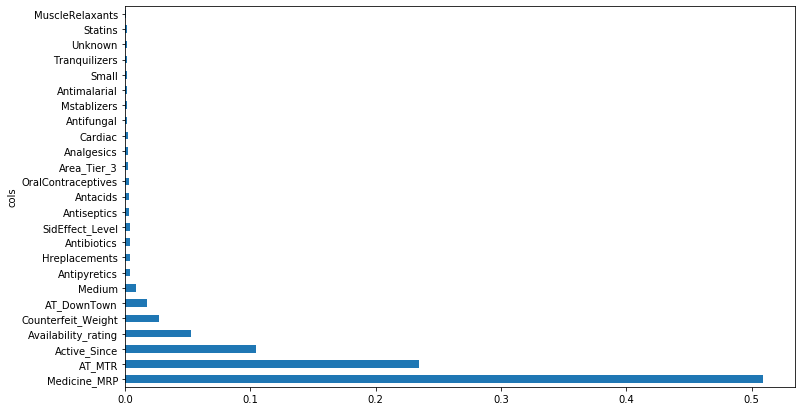

In [69]:
plot_fi(fi[:25])

In [ ]:
param_dist = {"n_estimators":[100,200,300,500,777],
                "max_features": [5,10,12,15,20,24],
                "bootstrap": [True, False],
                "criterion":['mae'],
                "max_depth":[None,5,8,12,15],
                "min_samples_leaf":[1,2,5,10,15],
                "min_samples_split":[2,5,10,15],
                 'max_leaf_nodes':[None,2,5,10,15]}

In [ ]:
5*6*2*1*5*5*4*5*300

In [ ]:
n_iter_search=5
random_search=RandomizedSearchCV(rfr,param_distributions=param_dist,
                                n_iter=n_iter_search,
                                scoring='neg_mean_squared_error',
                                cv=10)

In [ ]:
random_search.fit(x_train1,y_train1)

In [ ]:
random_search.best_estimator_

In [ ]:
report(random_search.cv_results_,3)

In [ ]:
rf=random_search.best_estimator_
rf

In [ ]:
rf.fit(x_train1,y_train1)

In [ ]:
predict_sales3=rf.predict(x_train2)

In [ ]:
MAE3=mean_absolute_error(y_train2,predict_sales3)
MAE3

In [ ]:
##Gradient boosting
gbm_params={'n_estimators':[50,100,200,444],
            'learning_rate': [0.01,.05,0.1,0.4,0.8,1],
            'max_depth':[1,2,3,4,5,6],
            'subsample':[0.5,0.8,1],
            'max_features':[5,10,15,20,24]
            }

In [ ]:
4*6*6*3*5

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model=GradientBoostingRegressor()

In [ ]:
random_search=RandomizedSearchCV(model,scoring='neg_mean_absolute_error',
                                param_distributions=gbm_params,
                                cv=10,n_iter=200,
                                n_jobs=-1,verbose=False)

In [ ]:
random_search.fit(x_train1,y_train1)

In [ ]:
report(random_search.cv_results_,3)

In [ ]:
gbm=random_search.best_estimator_

In [ ]:
gbm

In [ ]:
gbm.fit(x_train1,y_train1)

In [ ]:
predict_sales4=gbm.predict(x_train2)
MAE4=mean_absolute_error(y_train2,predict_sales4)
MAE4

In [ ]:
Score = 1-(MAE4/1660)
Score

In [ ]:
##XGBOOST

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor
xgb_params = { "n_estimators":[25,50,100,150,200]}
xgb1=XGBRegressor(subsample=0.8,colsample_bylevel=0.8,colsample_bytree=0.8)
grid_search=GridSearchCV(xgb1,cv=10,param_grid=xgb_params,scoring='neg_mean_absolute_error',
                         verbose=False,n_jobs=-1)

grid_search.fit(x_train1,y_train1)

In [ ]:
xgb=grid_search.best_estimator_

In [ ]:
xgb.fit(x_train1,y_train1)

In [ ]:
predict_sales5=xgb.predict(x_train2)
MAE5=mean_absolute_error(y_train2,predict_sales5)
MAE5

In [ ]:
Score = 1-(MAE5/1660)
Score

In [ ]:
param_dist_XBG = {
              "max_depth": [2,3,4,5,6],
              "learning_rate":[0.01,0.05,0.1,0.3,0.5],
    "min_child_weight":[4,5,6],
              "subsample":[i/10.0 for i in range(6,10)],
 "colsample_bytree":[i/10.0 for i in range(6,10)],
               "reg_alpha":[1e-5, 1e-2, 0.1, 1,5,10],
              "gamma":[i/10.0 for i in range(2,10)],
    "n_estimators":[100,333,500,700,999],
    'scale_pos_weight':[2,3,4,5,6,7,8,9]
    
              }

In [ ]:
4*5*3*4*4*6*8*4*8


In [ ]:
clf=XGBRegressor()

In [ ]:
n_iter=10

random_search=RandomizedSearchCV(clf,n_jobs=-1,verbose=False,cv=10,n_iter=n_iter,scoring='neg_mean_absolute_error',
                                 param_distributions=param_dist_XBG)

In [ ]:
random_search.fit(x_train1,y_train1)

In [ ]:
xgb1=random_search.best_estimator_

In [ ]:
xgb1.fit(x_train1,y_train1)

In [ ]:
predict_sales6=xgb1.predict(x_train2)
MAE6=mean_absolute_error(y_train2,predict_sales6)
MAE6

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
rgr=MLPRegressor()

In [ ]:
##Neural Network
parameters={'learning_rate': ["constant", "invscaling", "adaptive"],
            'hidden_layer_sizes': [(12,14,18),(10,9,10),(20,18,14),(16,5,17,20),(22,24,28,4)],
            'alpha': [0.3,.1,.01,0.2,0.5],
            'activation': ["logistic", "relu", "tanh"]
            }

In [ ]:
3*5*5*3

In [ ]:
random_search=RandomizedSearchCV(rgr,n_iter=100,cv=10,param_distributions=parameters,
                scoring='neg_mean_absolute_error',random_state=2,n_jobs=-1,verbose=False)

In [ ]:
random_search.fit(x_train1,y_train1)

In [ ]:
random_search.best_estimator_

In [ ]:
mlp = random_search.best_estimator_

In [ ]:
mlp.fit(x_train1,y_train1)

In [ ]:
predict_sales7=mlp.predict(x_train2)
MAE7=mean_absolute_error(y_train2,predict_sales7)
MAE7

In [ ]:
## best model is to be applied for entire data set and to be predicted for test data set

In [ ]:
train_predict=#modelname.predict(x_train)
MAE_train=mean_absolute_error(y_train,train_predict)
MAE_train

In [ ]:

test_predict=##Best model.predict(cf_test)


In [ ]:
pd.DataFrame(test_predict).to_csv("Akash_Sriram_P3_part2",index=False)